In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 
from plotnine import *
import plotly.express as px
import plotly.graph_objects as go

# Lettura del DataSet

In [26]:
#path dataset
path = "../DataSet/"

In [27]:
train_df = pd.read_csv(path + 'Train_HR_Employee_Attrition.csv') 
test_df = pd.read_csv(path + 'Test_HR_Employee_Attrition.csv') 

In [28]:
train_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1000.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,963.000000,...,1176.000000,606.0,1176.000000,1176.000000,943.000000,1176.000000,1116.000000,1176.000000,1176.000000,1176.000000
mean,37.199000,803.650510,9.210034,2.884354,2.715986,66.299320,2.735544,2.021259,2.702381,6565.946002,...,2.702381,80.0,0.783163,11.019558,2.827147,2.755952,6.926523,4.188776,2.171769,4.107993
std,9.015802,406.683045,8.097024,1.016574,1.088876,20.266116,0.716228,1.069686,1.101578,4710.625603,...,1.092268,0.0,0.851385,7.694848,1.273120,0.707984,6.063193,3.637405,3.189785,3.601097
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,460.500000,2.000000,2.000000,2.000000,49.000000,2.000000,1.000000,2.000000,2969.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,804.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4969.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1169.000000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8585.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [22]:
test_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,258.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,227.000000,...,294.000000,147.0,294.000000,294.000000,235.000000,294.000000,280.000000,294.000000,294.000000,294.000000
mean,36.790698,797.826531,9.122449,3.027211,2.744898,64.258503,2.707483,2.234694,2.833333,6476.669604,...,2.751701,80.0,0.836735,12.319728,2.744681,2.782313,7.007143,4.391156,2.251701,4.183673
std,9.281314,391.197794,8.159584,1.047966,1.111324,20.534359,0.693321,1.232116,1.103567,4835.509358,...,1.036656,0.0,0.854946,8.045083,1.415242,0.701213,5.923644,3.567017,3.354674,3.438430
min,18.000000,111.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1393.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,477.000000,2.000000,2.000000,2.000000,45.000000,2.000000,1.000000,2.000000,3009.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,793.500000,7.000000,3.000000,3.000000,64.000000,3.000000,2.000000,3.000000,4601.000000,...,3.000000,80.0,1.000000,10.000000,2.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,42.000000,1125.000000,12.000000,4.000000,4.000000,82.000000,3.000000,3.000000,4.000000,7976.500000,...,4.000000,80.0,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,2.750000,7.000000
max,60.000000,1495.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19943.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,36.000000,18.000000,15.000000,17.000000


In [23]:
frames = [train_df, test_df]
df = pd.concat(frames, ignore_index=True)

In [24]:
df.to_csv(r''+path+'Dataset.csv', index = False)

In [25]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1258.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1190.000000,...,1470.000000,753.0,1470.000000,1470.000000,1178.000000,1470.000000,1396.000000,1470.000000,1470.000000,1470.000000
mean,37.115262,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6548.915966,...,2.712245,80.0,0.793878,11.279592,2.810696,2.761224,6.942693,4.229252,2.187755,4.123129
std,9.068654,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4732.775331,...,1.081209,0.0,0.852077,7.780782,1.302499,0.706476,6.033444,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2973.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4907.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8437.500000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# 1 - DataSemantics

## Dimensions - Columns

In [9]:
print('Dimensions (Rows x Columns): ', df.shape[0], 'x', df.shape[1])
print('Features: ', df.columns.tolist())

Dimensions (Rows x Columns):  1470 x 33
Features:  ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


## Distinct values

In [10]:
print('\n Distinct values:')
print(df.nunique())


 Distinct values:
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1112
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany          

## Missing Values

In [11]:
print('\n N° null values:')
print(df.isna().sum())


 N° null values:
Age                         212
Attrition                     0
BusinessTravel              131
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EnvironmentSatisfaction       0
Gender                       75
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome               280
MonthlyRate                   0
NumCompaniesWorked            0
Over18                      468
OverTime                      0
PercentSalaryHike             0
PerformanceRating           172
RelationshipSatisfaction      0
StandardHours               717
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear       292
WorkLifeBalance               0
YearsAtCompany               74
YearsInCurrentRole    

# 2 - Statistics and Analysis -  2D: HistPlot, Value Analysis

In [12]:
numeric_col = df._get_numeric_data()
numeric_col

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,52.0,593,9,4,2,88,3,3,3,8446.0,...,3,80.0,0,20,2.0,2,8.0,7,2,13
1,36.0,1218,1,1,2,52,3,5,3,4834.0,...,3,80.0,1,21,3.0,3,1.0,8,1,6
2,NaN,530,16,3,3,36,3,2,4,4768.0,...,3,NaN,1,7,4.0,3,1.0,5,1,2
3,33.0,953,5,4,2,65,3,1,2,2799.0,...,2,NaN,0,12,1.0,3,3.0,7,0,7
4,NaN,1380,9,2,3,75,3,1,4,7978.0,...,3,80.0,0,2,NaN,3,10.0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,38.0,890,2,3,4,97,3,1,4,8740.0,...,1,NaN,0,2,NaN,3,8.0,2,2,2
1466,44.0,1111,8,2,3,93,3,2,1,6465.0,...,2,NaN,1,6,5.0,3,4.0,2,1,2
1467,30.0,163,24,1,4,30,3,2,4,2476.0,...,4,80.0,0,9,3.0,2,1.0,4,1,4
1468,36.0,457,26,2,2,85,2,1,3,2088.0,...,2,80.0,0,4,3.0,2,8.0,2,1,3


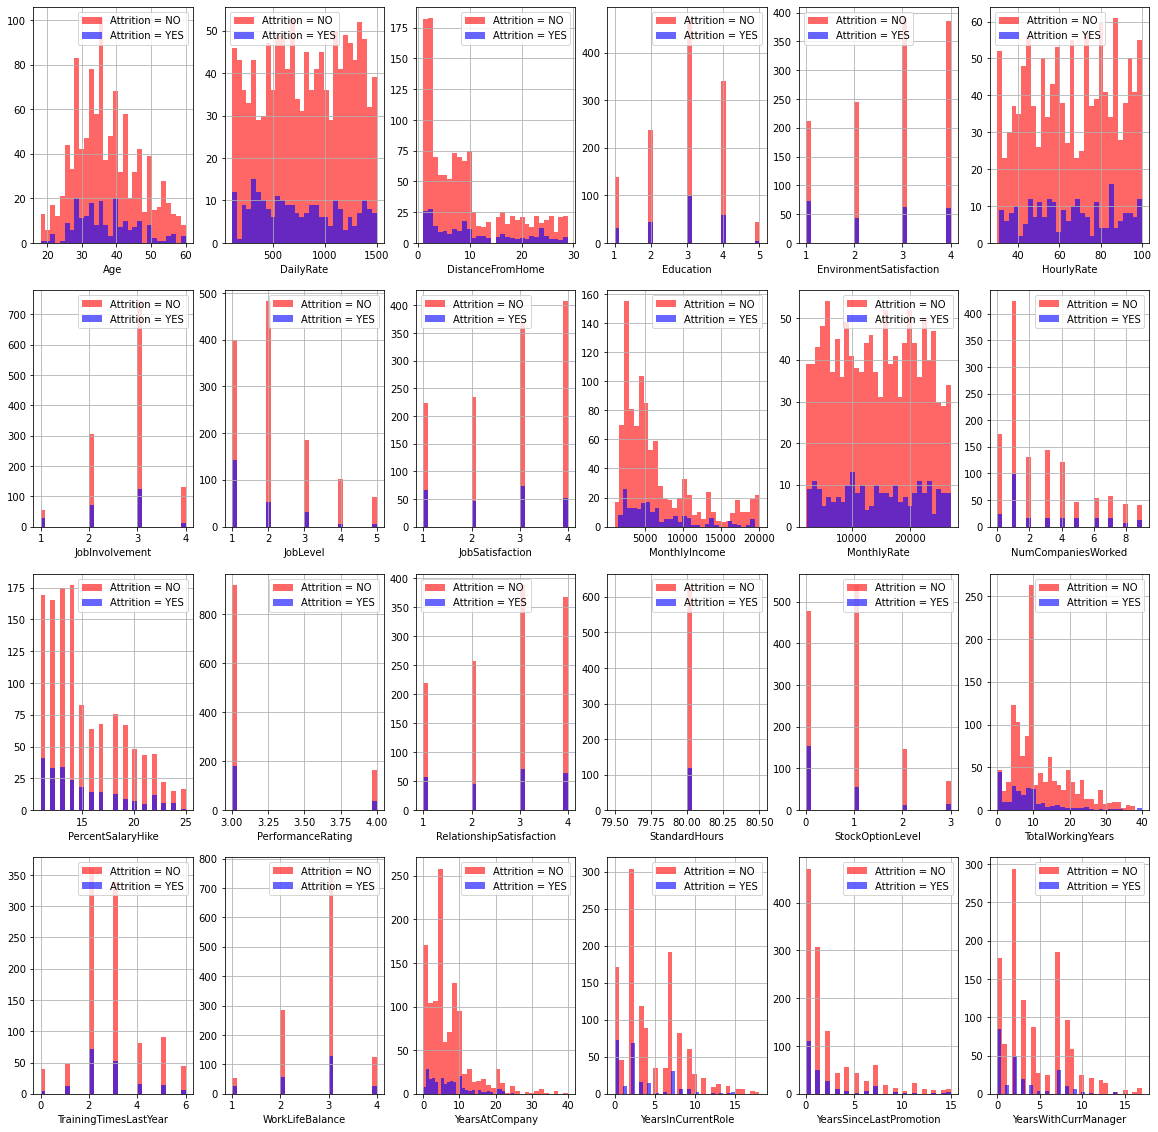

In [13]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(numeric_col, 1):
    plt.subplot(4, 6, i)
    df[df["Attrition"] == "No"][column].hist(bins=30, color='red', label='Attrition = NO', alpha=0.6)
    df[df["Attrition"] == "Yes"][column].hist(bins=30, color='blue', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

### Attrition - Age|MonthlyIncome|MaritalStatus

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning:

geom_point : Removed 452 rows containing missing values.



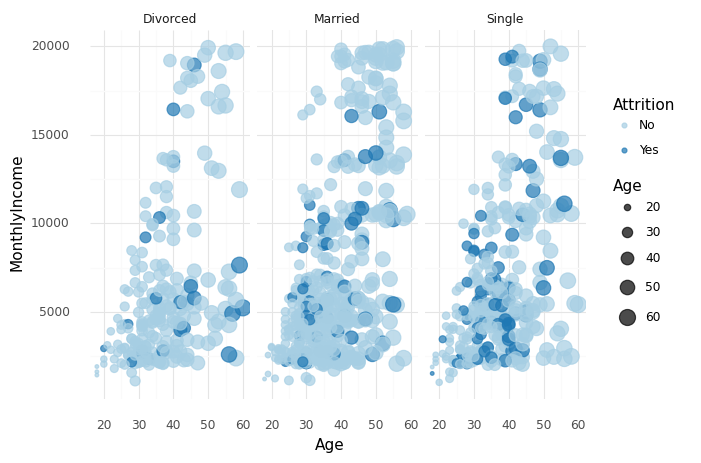

<ggplot: (157165442621)>

In [103]:
ggplot(df, aes(x='Age', y='MonthlyIncome', size = "Age", color = 'Attrition')) +\
        geom_point(alpha = 0.7) +\
        theme_minimal()+facet_wrap("MaritalStatus") +\
        scale_color_brewer(type = "qual", palette="Paired")

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning:

geom_point : Removed 500 rows containing missing values.



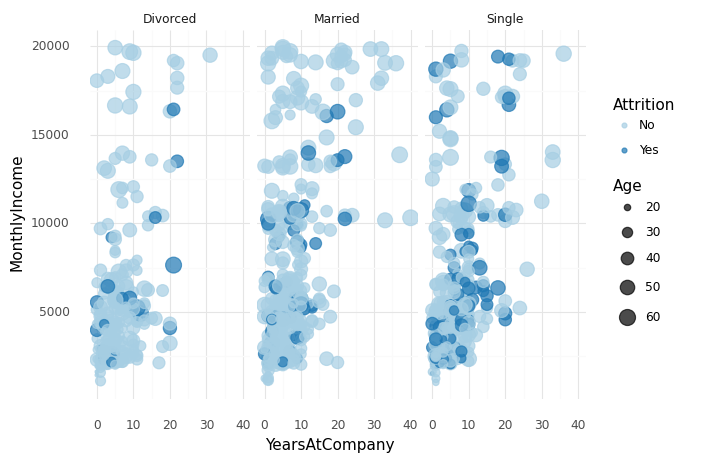

<ggplot: (157163036856)>

In [109]:
ggplot(df, aes(x='YearsAtCompany', y='MonthlyIncome', size = "Age", color = 'Attrition')) +\
        geom_point(alpha = 0.7) +\
        theme_minimal()+facet_wrap("MaritalStatus") +\
        scale_color_brewer(type = "qual", palette="Paired")


C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\scales\scale_size.py:48: PlotnineWarning:

Using alpha for a discrete variable is not advised.

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning:

geom_point : Removed 335 rows containing missing values.



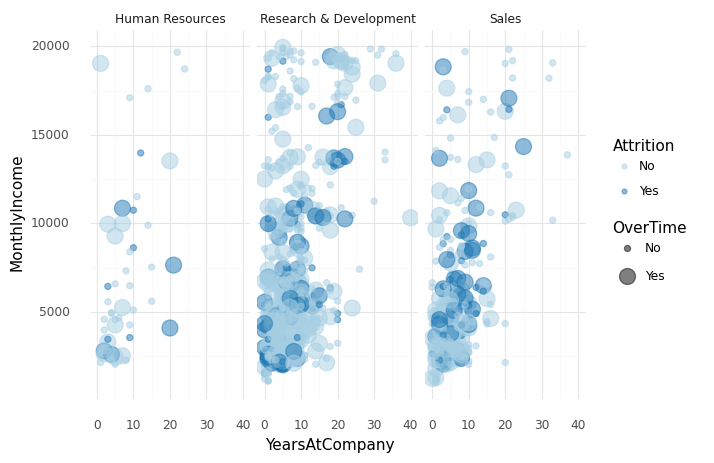

<ggplot: (157165015580)>

In [175]:
ggplot(df, aes(x='YearsAtCompany', y='MonthlyIncome', size = "OverTime", color = 'Attrition')) +\
        geom_point(alpha = 0.5) +\
        theme_minimal()+facet_wrap("Department ") +\
        scale_color_brewer(type = "qual", palette="Paired")

### Attrition - Distance From Home

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


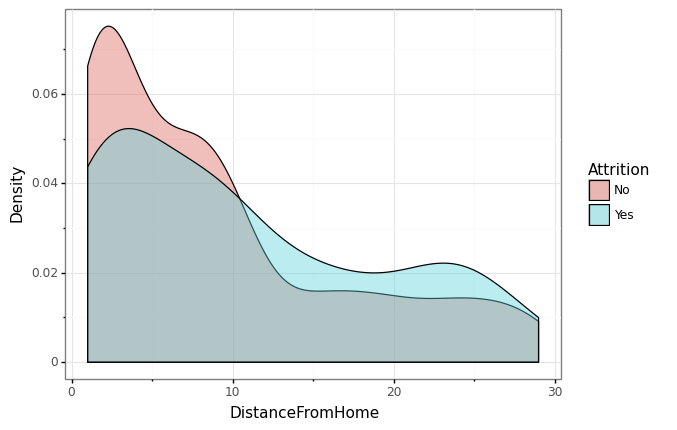

<ggplot: (117992937286)>

In [102]:
ggplot(df,aes(x= "DistanceFromHome",fill="Attrition"))+\
        geom_density(alpha=0.4) + theme_bw() +\
        labs(y = "Density")

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning:

geom_point : Removed 276 rows containing missing values.



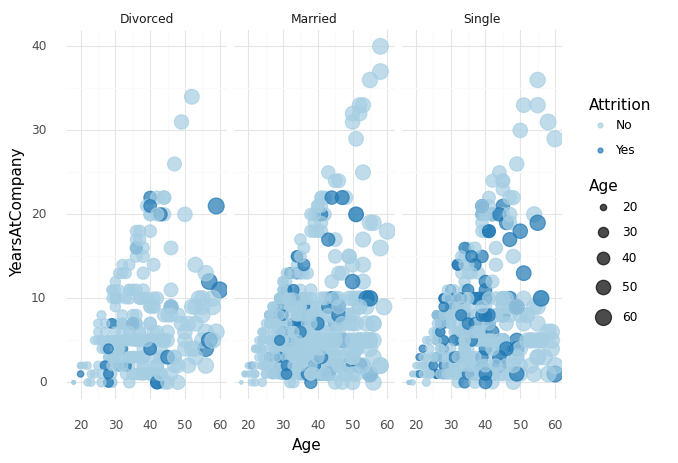

<ggplot: (157165027485)>

In [101]:
ggplot(df, aes(x='Age', y='YearsAtCompany', size = "Age", color = 'Attrition')) +\
        geom_point(alpha = 0.7) +\
        theme_minimal()+facet_wrap("MaritalStatus") +\
        scale_color_brewer(type = "qual", palette="Paired")

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning:

geom_point : Removed 452 rows containing missing values.



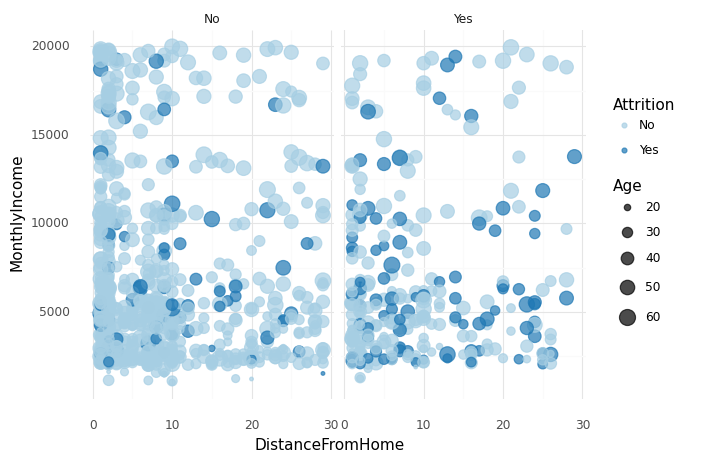

<ggplot: (157163571908)>

In [171]:
ggplot(df, aes(x='DistanceFromHome', y='MonthlyIncome', size = "Age", color = 'Attrition')) +\
        geom_point(alpha = 0.7) +\
        theme_minimal()+facet_wrap("OverTime") +\
        scale_color_brewer(type = "qual", palette="Paired")

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning:

geom_point : Removed 452 rows containing missing values.



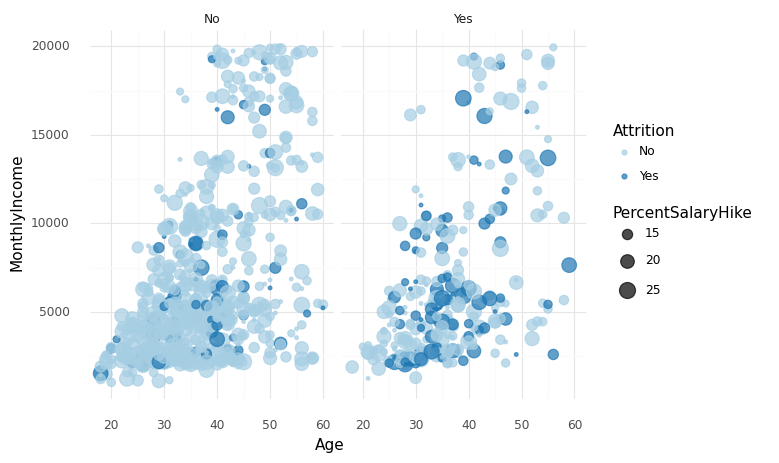

<ggplot: (157167461651)>

In [170]:
ggplot(df, aes(x='Age', y='MonthlyIncome', size = "PercentSalaryHike", color = 'Attrition')) +\
        geom_point(alpha = 0.7) +\
        theme_minimal()+facet_wrap("OverTime") +\
        scale_color_brewer(type = "qual", palette="Paired")

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



(array([1232.,  147.,   17.]),
 array([ 0.        , 13.33333333, 26.66666667, 40.        ]),
 <a list of 3 Patch objects>)

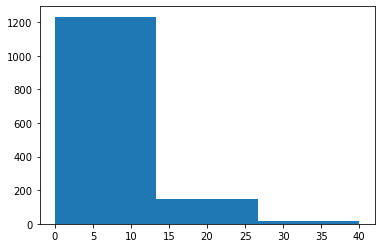

In [140]:
plt.hist(df["YearsAtCompany"], bins=3)

In [149]:
l = []
for i in df["YearsAtCompany"]:
    if i <14:
        l.append("(0-13) Low")
    elif i <27:
        l.append("(14-26) Middel")
    elif i <=40:
        l.append("(27-40) High")
    else:
        l.append(np.nan)
df["YearAtCompanyBins"] = l
df.sort_values(by=['YearAtCompanyBins'], key=lambda col: col.str.lower(), ascending=True)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearAtCompanyBins
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,80.0,0,20,2.0,2,8.0,7,2,13,(0-13) Low
947,37.0,No,Travel_Frequently,867,Research & Development,8,4,Life Sciences,4,Male,...,NaN,1,14,3.0,3,4.0,8,7,6,(0-13) Low
946,28.0,Yes,NaN,1404,Research & Development,17,3,Technical Degree,3,Male,...,80.0,1,6,2.0,2,0.0,1,0,3,(0-13) Low
945,29.0,No,Travel_Frequently,746,Research & Development,8,4,Life Sciences,3,Male,...,80.0,0,11,3.0,3,1.0,7,1,8,(0-13) Low
944,31.0,No,Travel_Rarely,971,Sales,1,3,Technical Degree,4,Male,...,NaN,0,10,4.0,3,1.0,9,8,6,(0-13) Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,NaN,No,Travel_Frequently,134,Research & Development,2,3,Life Sciences,3,Female,...,NaN,0,4,NaN,4,NaN,1,0,2,NaN
1391,44.0,No,Non-Travel,426,Research & Development,10,4,Life Sciences,3,Male,...,80.0,1,9,NaN,3,NaN,7,7,2,NaN
1411,36.0,No,Travel_Rarely,549,Research & Development,7,2,Medical,4,Male,...,NaN,0,8,NaN,3,NaN,2,2,1,NaN
1417,27.0,No,Travel_Rarely,796,Research & Development,12,5,Medical,4,Female,...,NaN,0,15,6.0,2,NaN,8,7,8,NaN


In [167]:
set(df["NumCompaniesWorked"].values)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

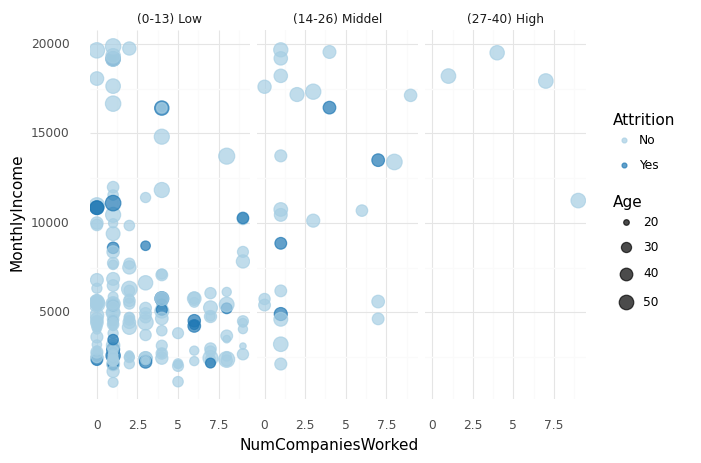

<ggplot: (157165370311)>

In [168]:
ggplot(df.dropna(), aes(x='NumCompaniesWorked', y='MonthlyIncome', size = "Age", color = 'Attrition')) +\
        geom_point(alpha = 0.7) +\
        theme_minimal()+facet_wrap("YearAtCompanyBins") +\
        scale_color_brewer(type = "qual", palette="Paired")

# 2 - Statistics and Analysis - 2D: Compare Attrition and Features

No     1233
Yes     237
Name: Attrition, dtype: int64
No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


Text(0.5, 1.0, 'Attrition')

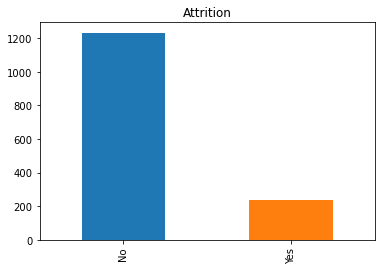

In [45]:
print(df.Attrition.value_counts())
print(df.Attrition.value_counts(normalize=True))
df['Attrition'].value_counts().plot(kind='bar', color=('C0','C1')).set_title('Attrition')

In [46]:
def plot_percentage(df, feature):
    print("Count Valori")
    print(df[feature].value_counts())
    print("Percentage")
    print(df[feature].value_counts(normalize=True))
    #Create plot
    plot = sns.countplot(feature, data=df)
    for p in plot.patches:
        count_percentage = '{:.1f}%'.format(100* p.get_height() / len(df[feature]))
        a_x = p.get_x() + p.get_width() / 2 - 0.05
        a_y = p.get_y() + p.get_height()
        plot.annotate(count_percentage, (a_x, a_y), size = 11)
        
    plt.show()


Count Valori
No     1233
Yes     237
Name: Attrition, dtype: int64
Percentage
No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


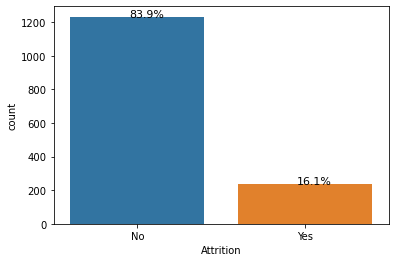

In [47]:
plot_percentage(df, "Attrition")

Hourly Rate Mean
20.704225352112676
Hourly Rate Std
4.146589863793162
Mean, Deviation - Attrition = Yes
65.57383966244726
20.057507807158082
Mean, Deviation - Attrition = No
65.9521492295215
20.372487864867416


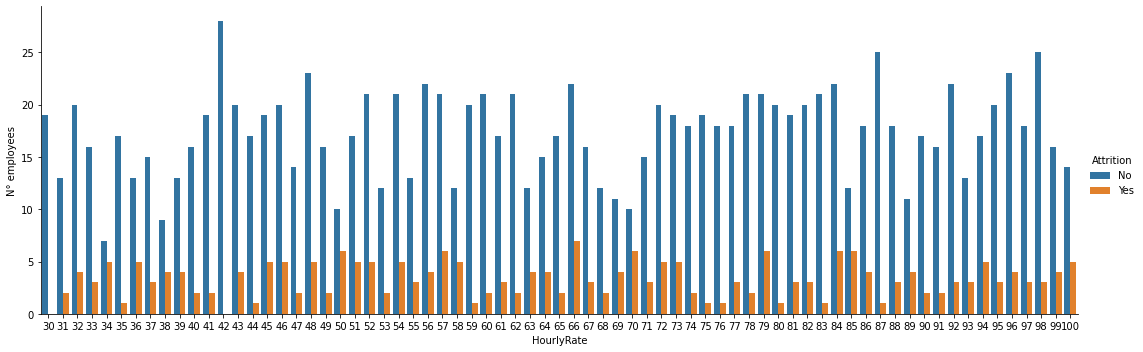

In [48]:
print("Hourly Rate Mean")
print(df.HourlyRate.value_counts().mean())
print("Hourly Rate Std")
print(np.std(df.HourlyRate.value_counts()))
#---------------
# Mean, Deviation if Attrition = Yes
print("Mean, Deviation - Attrition = Yes")
print(df[df.Attrition=='Yes']['HourlyRate'].mean())
print(np.std(df[df.Attrition=='Yes']['HourlyRate']))
# --------
# Mean, Deviation if Attrition = No
print("Mean, Deviation - Attrition = No")
print(df[df.Attrition=='No']['HourlyRate'].mean())
print(np.std(df[df.Attrition=='No']['HourlyRate']))
      
sns.catplot('HourlyRate', data=df, aspect=3, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° employees')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


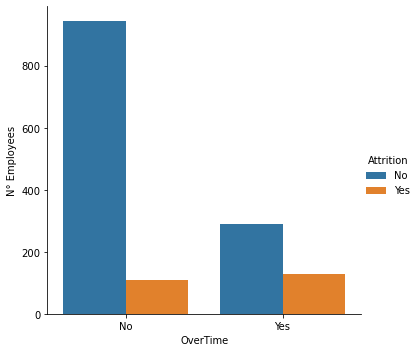

In [49]:
sns.factorplot("OverTime", data=df, aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')

In [50]:
#MonthlyIncome in Bins
df_salary = df[["MonthlyIncome", "Attrition"]]
df_salary = df_salary[df_salary["MonthlyIncome"].notnull()]

In [51]:
def in_bin_salary(df):
    dtmp = []
    for i in df:
        if(i < 7500): 
            dtmp.append("Low")
        elif(i <14000):
            dtmp.append("Medium")
        else:
            dtmp.append("High")
    return dtmp
def in_bin_salary2(df): #Per avere prima Low tanto il valore di Attrition è uguale
    dtmp = []
    for i in df:
        if(i < 7500): 
            dtmp.append("Low")
        elif(i <14000):
            dtmp.append("Medium")
        else:
            dtmp.append("High")
    dtmp[0] = "Low"
    dtmp[1] = "Medium"
    return dtmp

In [52]:
df_salary["MonthlyIncome"] = in_bin_salary2(df_salary["MonthlyIncome"]) 

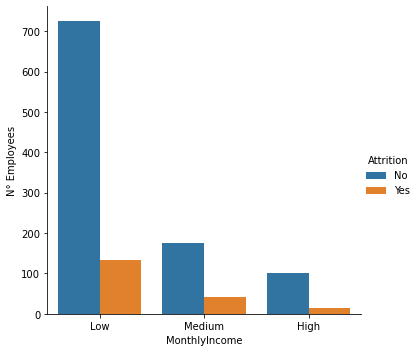

In [53]:
sns.factorplot("MonthlyIncome", data=df_salary, aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')

In [54]:
df_age = df[["Age", "Attrition"]]
df_age = df_age[df_age["Age"].notnull()]
def in_bin_age(df):
    dtmp = []
    for i in df:
        if(i < 30): 
            dtmp.append("20")
        elif(i <40):
            dtmp.append("30")
        elif(i<50):
            dtmp.append("40")
        else:
            dtmp.append("50")
    return dtmp

In [55]:
df_age["Age"] = in_bin_age(df_age["Age"]) 

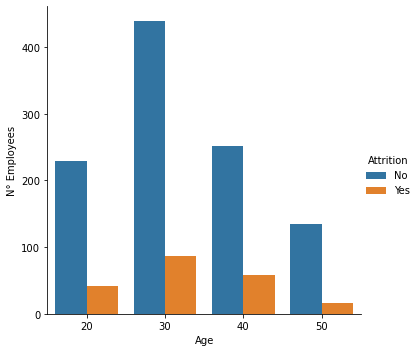

In [56]:
sns.factorplot("Age", data=df_age, aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')

---- BusinessTravel
---- Department
---- EnvironmentSatisfaction
---- Gender
---- JobLevel
---- JobSatisfaction
---- MaritalStatus
---- RelationshipSatisfaction
---- WorkLifeBalance
---- NumCompaniesWorked


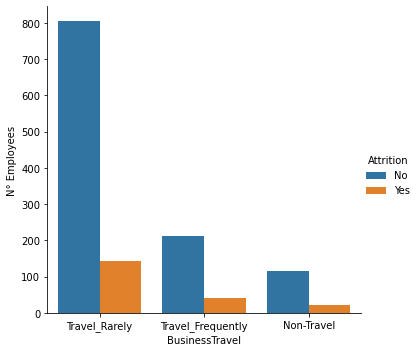

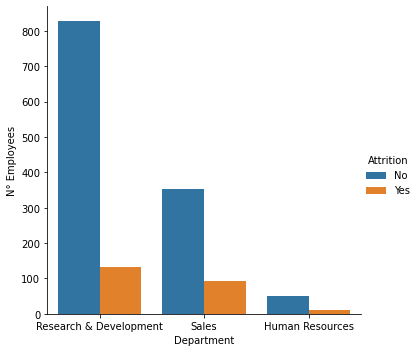

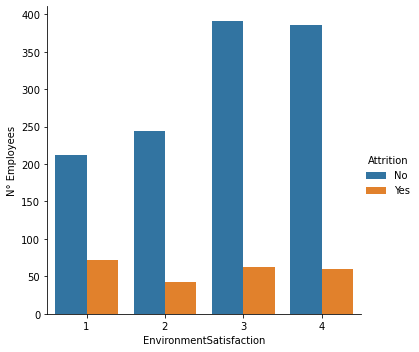

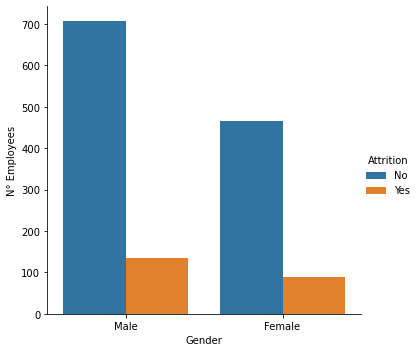

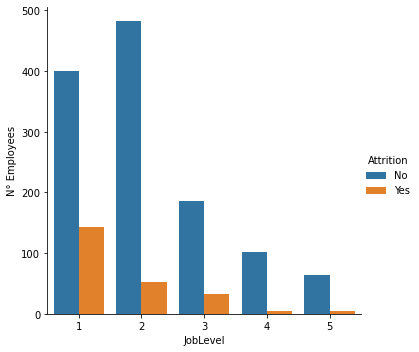

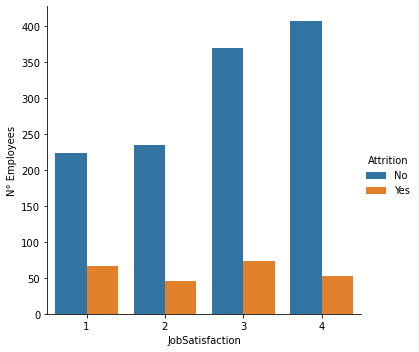

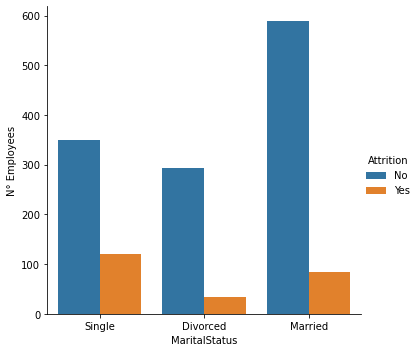

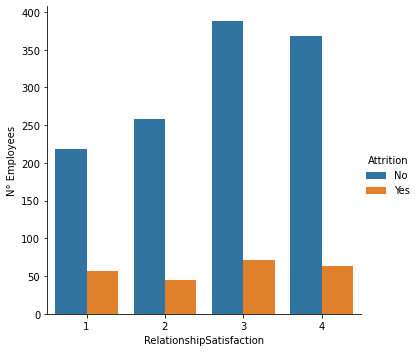

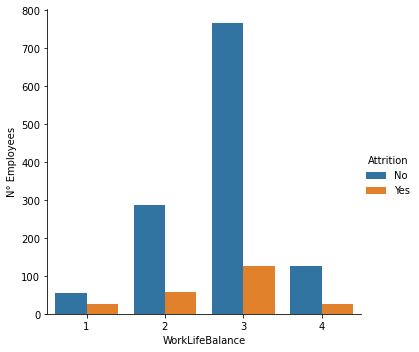

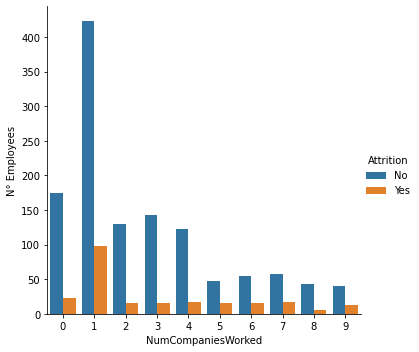

In [57]:
print("---- BusinessTravel")
sns.factorplot("BusinessTravel", data=df, aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')
# DEPARTMENT
print("---- Department")
sns.factorplot("Department", data=df, aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')
# ENVIRONMENTSATISFACTION
print("---- EnvironmentSatisfaction")
sns.factorplot("EnvironmentSatisfaction", data=df, aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')
# GENDER
print("---- Gender")
sns.factorplot("Gender", data=df, aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')
# JOBLEVEL
print("---- JobLevel")
sns.factorplot("JobLevel", data=df, aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')
# JOBSATISFACTION
print("---- JobSatisfaction")
sns.factorplot("JobSatisfaction", data=df, aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')
# MARITALSTATUS
print("---- MaritalStatus")
sns.factorplot("MaritalStatus", data=df, aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')
# RELATIONSHIPSATISFACTION
print("---- RelationshipSatisfaction")
sns.factorplot("RelationshipSatisfaction", data=df, aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')
# WORKLIFEBALANCE
print("---- WorkLifeBalance")
sns.factorplot("WorkLifeBalance", data=df, aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')

# NUMCOMPANIESWORKED
print("---- NumCompaniesWorked")
sns.factorplot("NumCompaniesWorked", data=df, aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')



<ipython-input-58-6f7c1c9aa866>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy["Attrition"] = Attr_toN(df_copy["Attrition"])


---- NumCompaniesWorked_Gender
---- NumCompaniesWorked


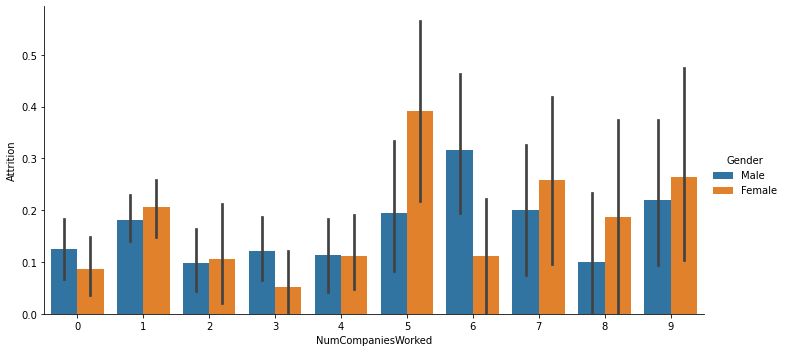

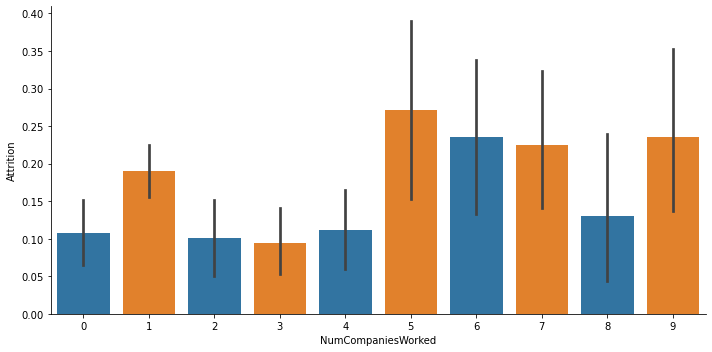

In [58]:
df_copy = df
df_copy = df_copy[df_copy["Gender"].notnull()]
df_copy["Attrition"] = Attr_toN(df_copy["Attrition"])

# NUMCOMPANIESWORKED - Gender
print("---- NumCompaniesWorked_Gender")
sns.factorplot(x ="NumCompaniesWorked", y = "Attrition", data=df_copy, aspect=2, kind='bar', hue='Gender', palette=['C0', 'C1'])


# NUMCOMPANIESWORKED - Gender
print("---- NumCompaniesWorked")
sns.factorplot(x ="NumCompaniesWorked", y = "Attrition", data=df_copy, aspect=2, kind='bar', palette=['C0', 'C1'])


In [59]:
def in_bin_hour(df):
    dtmp = []
    for i in df:
        if(i < 40): 
            dtmp.append("30")
        elif(i <50):
            dtmp.append("40")
        elif(i<60):
            dtmp.append("50")
        elif(i<70):
            dtmp.append("60")
        elif(i<80):
            dtmp.append("70")
        elif(i<90):
            dtmp.append("80")
        else:
            dtmp.append("90")
    return dtmp

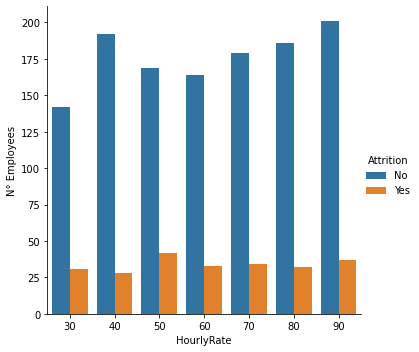

In [60]:
# HOURLYRATE
df_hour = df[["HourlyRate", "Attrition"]]
df_hour = df_hour[df_hour["HourlyRate"].notnull()]
df_hour["HourlyRate"] = in_bin_hour(df_hour["HourlyRate"]) 
sns.factorplot("HourlyRate", data=df_hour, aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')


In [61]:
def in_bin_dist(df):
    dtmp = []
    for i in df:
        if(i < 5): 
            dtmp.append(5)
        elif(i <10):
            dtmp.append(10)
        elif(i<15):
            dtmp.append(15)
        elif(i<20):
            dtmp.append(20)
        elif(i<25):
            dtmp.append(25)
        else:
            dtmp.append(30)
    return dtmp

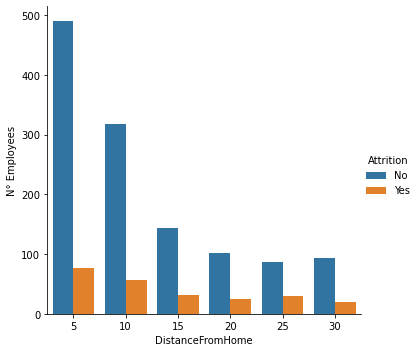

In [62]:
# DISTANCEFROMHOME
df_dist = df[["DistanceFromHome", "Attrition"]]
df_dist = df_dist[df_dist["DistanceFromHome"].notnull()]
df_dist["DistanceFromHome"] = in_bin_dist(df_dist["DistanceFromHome"]) 
sns.factorplot("DistanceFromHome", data=df_dist, aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')


In [63]:
def in_bin_dist(df):
    dtmp = []
    for i in df:
        if(i < 5): 
            dtmp.append(5)
        elif(i <10):
            dtmp.append(10)
        elif(i<15):
            dtmp.append(15)
        elif(i<20):
            dtmp.append(20)
        elif(i<25):
            dtmp.append(25)
        else:
            dtmp.append(30)
    return dtmp

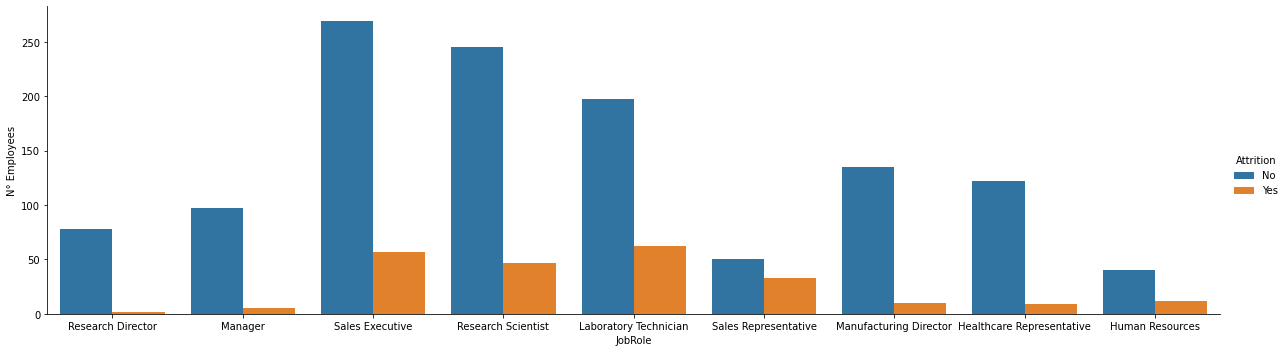

In [64]:
# JOBROLE
sns.factorplot("JobRole", data=df, aspect=3.4, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')

# 2 - Statistics and Analysis - 2D: MultiCompare

In [65]:
def in_bin_salary(df):
    dtmp = []
    for i in df:
        if(i < 7500): 
            dtmp.append(1)
        elif(i <14000):
            dtmp.append(2)
        else:
            dtmp.append(3)
    return dtmp

In [66]:
df_salary2 = df[["MonthlyIncome", "JobRole", "Attrition"]]
df_salary2 = df_salary2[df_salary2["MonthlyIncome"].notnull()]
df_salary2 = df_salary2[df_salary2["JobRole"].notnull()]
df_salary2["Attrition"] = Attr_toN(df_salary2["Attrition"])
df_salary2["MonthlyIncome"] = in_bin_salary(df_salary2["MonthlyIncome"])

In [67]:
columns = df_salary2["JobRole"].unique()
print(columns)

['Research Director' 'Manager' 'Sales Executive' 'Research Scientist'
 'Laboratory Technician' 'Sales Representative' 'Manufacturing Director'
 'Healthcare Representative' 'Human Resources']


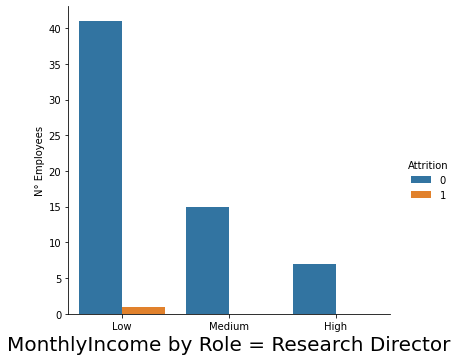

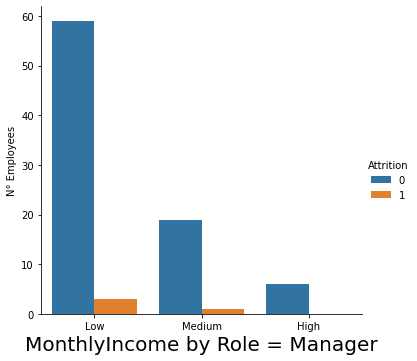

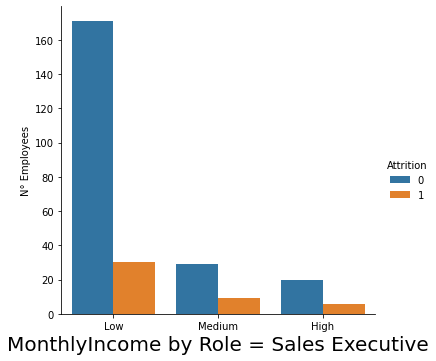

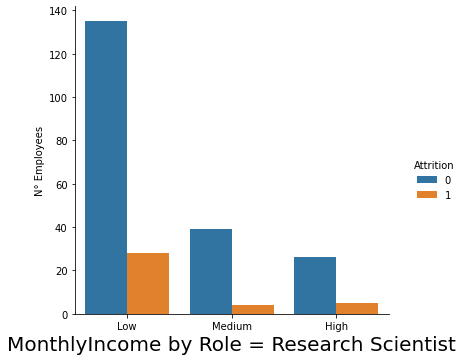

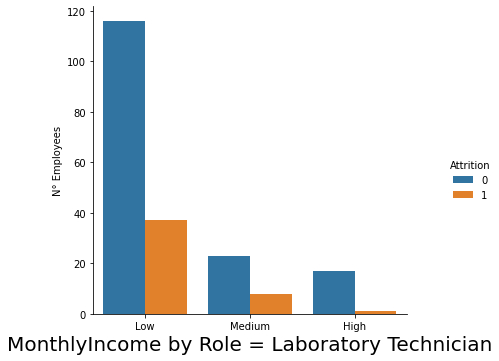

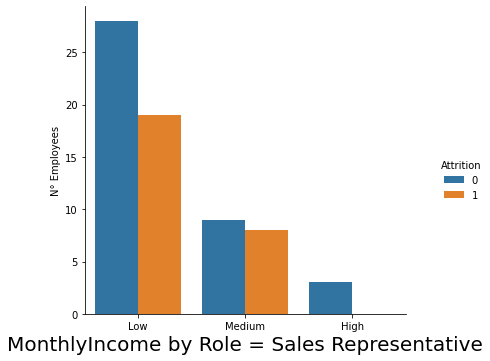

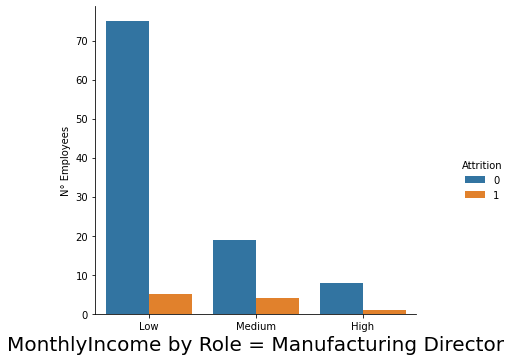

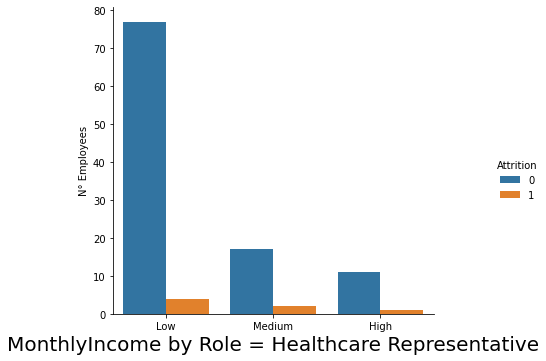

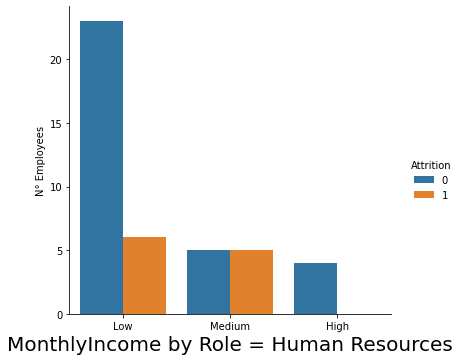

In [68]:
for i in columns:
    f = sns.factorplot("MonthlyIncome", data=df_salary2[df_salary2["JobRole"] == i], aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')
    f.set_xlabels('MonthlyIncome by Role = ' + i, fontsize= 20)
    f.set_xticklabels(['Low', 'Medium', 'High'], fontsize= 10)

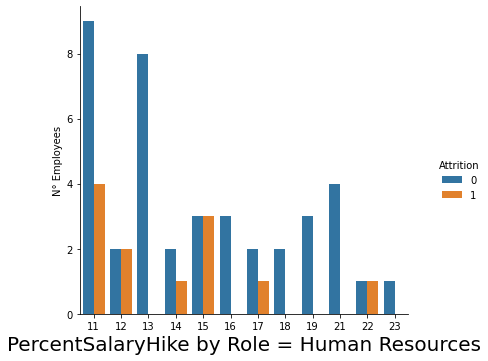

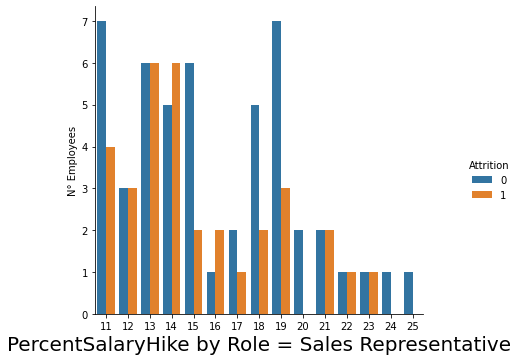

In [69]:
df_salary2 = df[[ "JobRole", "PercentSalaryHike", "Attrition"]]
df_salary2 = df_salary2[df_salary2["JobRole"].notnull()]
df_salary2 = df_salary2[df_salary2["PercentSalaryHike"].notnull()]
df_salary2["Attrition"] = Attr_toN(df_salary2["Attrition"])

for i in ["Human Resources", "Sales Representative"]:
    f = sns.factorplot("PercentSalaryHike", data=df_salary2[(df_salary2["JobRole"] == i)], aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')
    f.set_xlabels('PercentSalaryHike by Role = ' + i, fontsize= 20)


# 2 - Statistics and Analysis - BoxPlot for Continuous Features

In [70]:
sns.set_style("darkgrid")

In [71]:
columns = df.columns
print(columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [11]:
numeric_f = ["Age", "DailyRate", "DistanceFromHome","HourlyRate", "TotalWorkingYears", 
             "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole", 
             "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike", "YearsSinceLastPromotion",
            "YearsWithCurrManager", 
            "MonthlyIncome"]

In [12]:
for i in numeric_f:
    print(">> " + i + " - Mean, Stdev, Min, Max:")
    print("Mean - Attrition=NO: " + str(df[df.Attrition=='No'][i].mean()))
    print("Mean - Attrition=YES: " + str(df[df.Attrition=='Yes'][i].mean()))
    print("Stdev - Attrition=YES: " + str(np.std(df[df.Attrition=='Yes'][i])))      
    print("Stdev - Attrition=NO: " + str(np.std(df[df.Attrition=='No'][i])))
    print(" Mean : " + str(df[i].mean()) + " | Stdev: " + str(np.std(df[i])))
    print("Min: " + str(min(df[i])))
    print("Max: " + str(max(df[i])))
    print("")

>> Age - Mean, Stdev, Min, Max:
Mean - Attrition=NO: 37.17345971563981
Mean - Attrition=YES: 36.8128078817734
Stdev - Attrition=YES: 8.530122429808614
Stdev - Attrition=NO: 9.16325119106517
 Mean : 37.11526232114468 | Stdev: 9.065048751879592
Min: 18.0
Max: 60.0

>> DailyRate - Mean, Stdev, Min, Max:
Mean - Attrition=NO: 812.5044606650446
Mean - Attrition=YES: 750.3628691983122
Stdev - Attrition=YES: 401.0507338364501
Stdev - Attrition=NO: 403.04483883696025
 Mean : 802.4857142857143 | Stdev: 403.3718286009119
Min: 102
Max: 1499

>> DistanceFromHome - Mean, Stdev, Min, Max:
Mean - Attrition=NO: 8.915652879156529
Mean - Attrition=YES: 10.632911392405063
Stdev - Attrition=YES: 8.43467408776606
Stdev - Attrition=NO: 8.009383583321435
 Mean : 9.19251700680272 | Stdev: 8.104106529671775
Min: 1
Max: 29

>> HourlyRate - Mean, Stdev, Min, Max:
Mean - Attrition=NO: 65.9521492295215
Mean - Attrition=YES: 65.57383966244726
Stdev - Attrition=YES: 20.057507807158082
Stdev - Attrition=NO: 20.3724878

# 

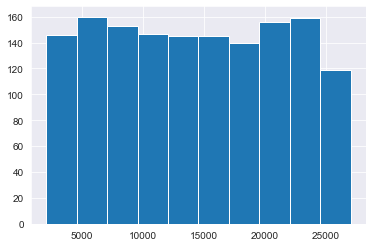

In [74]:
df["MonthlyRate"].hist()

In [75]:
def in_bin_rate(df):
    dtmp = []
    for i in df:
        if(i < 10000): 
            dtmp.append(1)
        elif(i <20000):
            dtmp.append(2)
        else:
            dtmp.append(3)
    return dtmp

['Research Director' 'Manager' 'Sales Executive' 'Research Scientist'
 'Laboratory Technician' 'Sales Representative' 'Manufacturing Director'
 'Healthcare Representative' 'Human Resources']


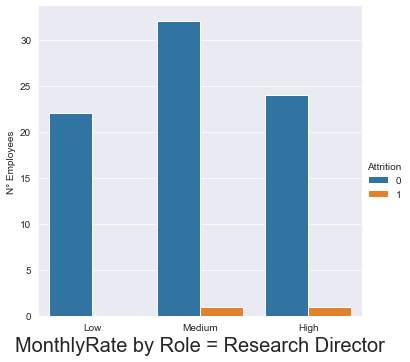

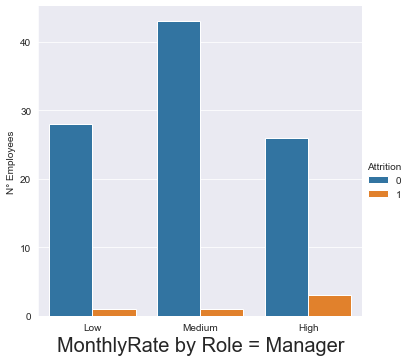

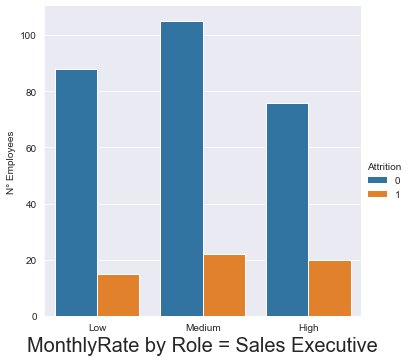

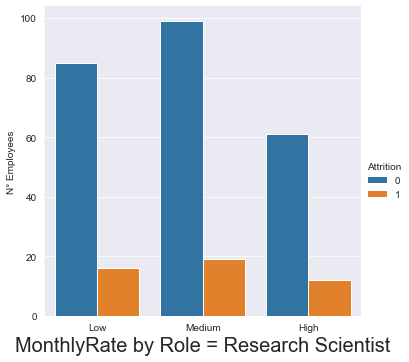

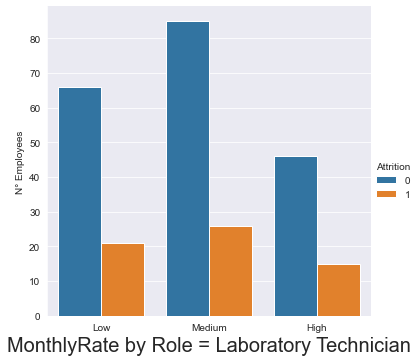

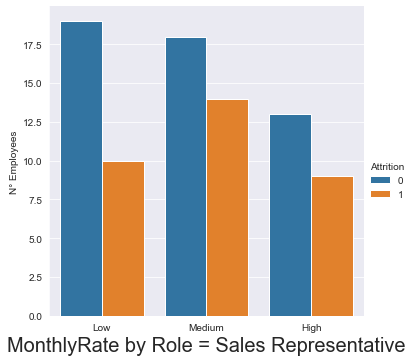

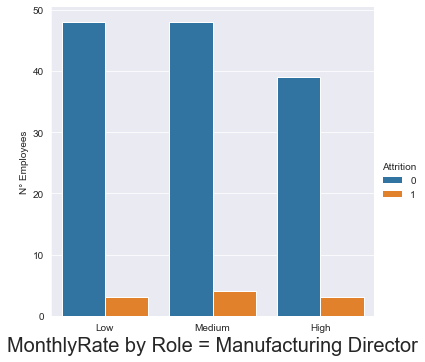

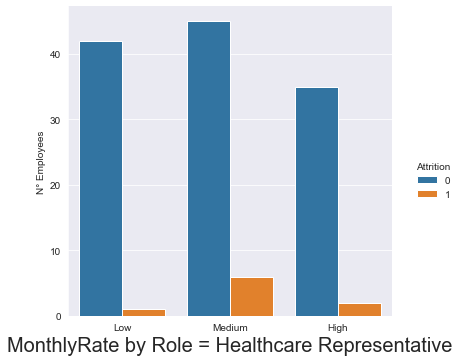

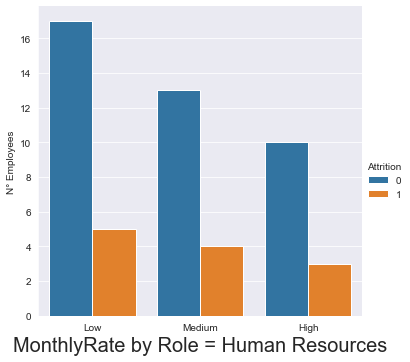

In [76]:
df_salary2 = df[["MonthlyRate", "JobRole", "Attrition"]]
df_salary2 = df_salary2[df_salary2["MonthlyRate"].notnull()]
df_salary2 = df_salary2[df_salary2["JobRole"].notnull()]
df_salary2["Attrition"] = Attr_toN(df_salary2["Attrition"])
df_salary2["MonthlyRate"] = in_bin_rate(df_salary2["MonthlyRate"])
columns = df_salary2["JobRole"].unique()
print(columns)
for i in columns:
    f = sns.factorplot("MonthlyRate", data=df_salary2[df_salary2["JobRole"] == i], aspect=1, kind='count', hue='Attrition', palette=['C0', 'C1']).set_ylabels('N° Employees')
    f.set_xlabels('MonthlyRate by Role = ' + i, fontsize= 20)
    f.set_xticklabels(['Low', 'Medium', 'High'], fontsize= 10)

In [16]:
perc = [0, 0 ,0]
tot = 0
for i in df["BusinessTravel"]:
    if i == "Non-Travel":
        perc[0] = perc[0] +1
        #tot = tot + 1
    if i == "Travel_Frequently":
        perc[1] = perc[1] +1
        #tot = tot + 1
    if i == "Travel_Rarely":
        perc[2] = perc[2] +1
        #tot = tot + 1

In [17]:
perc

[138, 254, 947]

In [18]:
import plotly.graph_objects as go

labels = ["Non-Travel", "Travel_Frequently", "Travel_Rarely"]
values = perc

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()